# Neural Network - Gas Turbine data

# Business Problem

predicting turbine energy yield (TEY) using ambient variables as features.

# Data collection and description

In [1]:
!pip install keras

     ---------------------------------------- 1.4/1.4 MB 599.6 kB/s eta 0:00:00


In [1]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from keras.models import Sequential

In [25]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C2AC-6915

 Directory of C:\Users\user\EXCELR\Assignments\Neural Network

04/06/2022  07:39 AM    <DIR>          .
04/03/2022  05:38 PM    <DIR>          ..
04/03/2022  11:15 PM    <DIR>          .ipynb_checkpoints
04/03/2022  11:18 AM            46,843 forestfires.csv
04/03/2022  11:18 AM         1,155,536 gas_turbines.csv
04/04/2022  09:45 PM           386,360 Neural Network - ForestFire Data.ipynb
04/06/2022  07:39 AM           360,337 Neural Network - gas turbine data.ipynb
04/03/2022  11:18 AM             1,130 problem statment(Gas turbines).txt
04/03/2022  11:18 AM                61 Problem_statement(fireforests).txt
04/03/2022  11:11 PM               850 Untitled.ipynb
               7 File(s)      1,951,117 bytes
               3 Dir(s)  168,024,338,432 bytes free


In [26]:
df=pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [27]:
df1 = df.copy()

In [28]:
df1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


C:\Users\user\EXCELR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


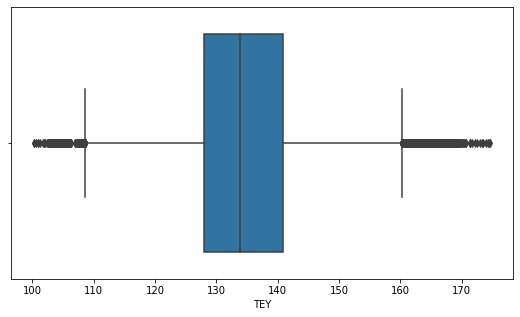

In [30]:
# outlier check
ax = sns.boxplot(df1['TEY'])

There are 3 Outlier instances in our data

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


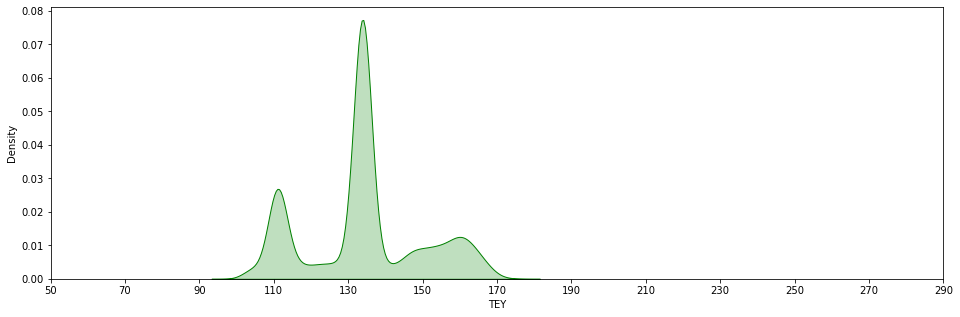

In [31]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['TEY'].skew()))
print("Kurtosis: {}".format(df1['TEY'].kurtosis()))
ax = sns.kdeplot(df1['TEY'],shade=True,color='g')
plt.xticks([i for i in range(50,300,20)])
plt.show()

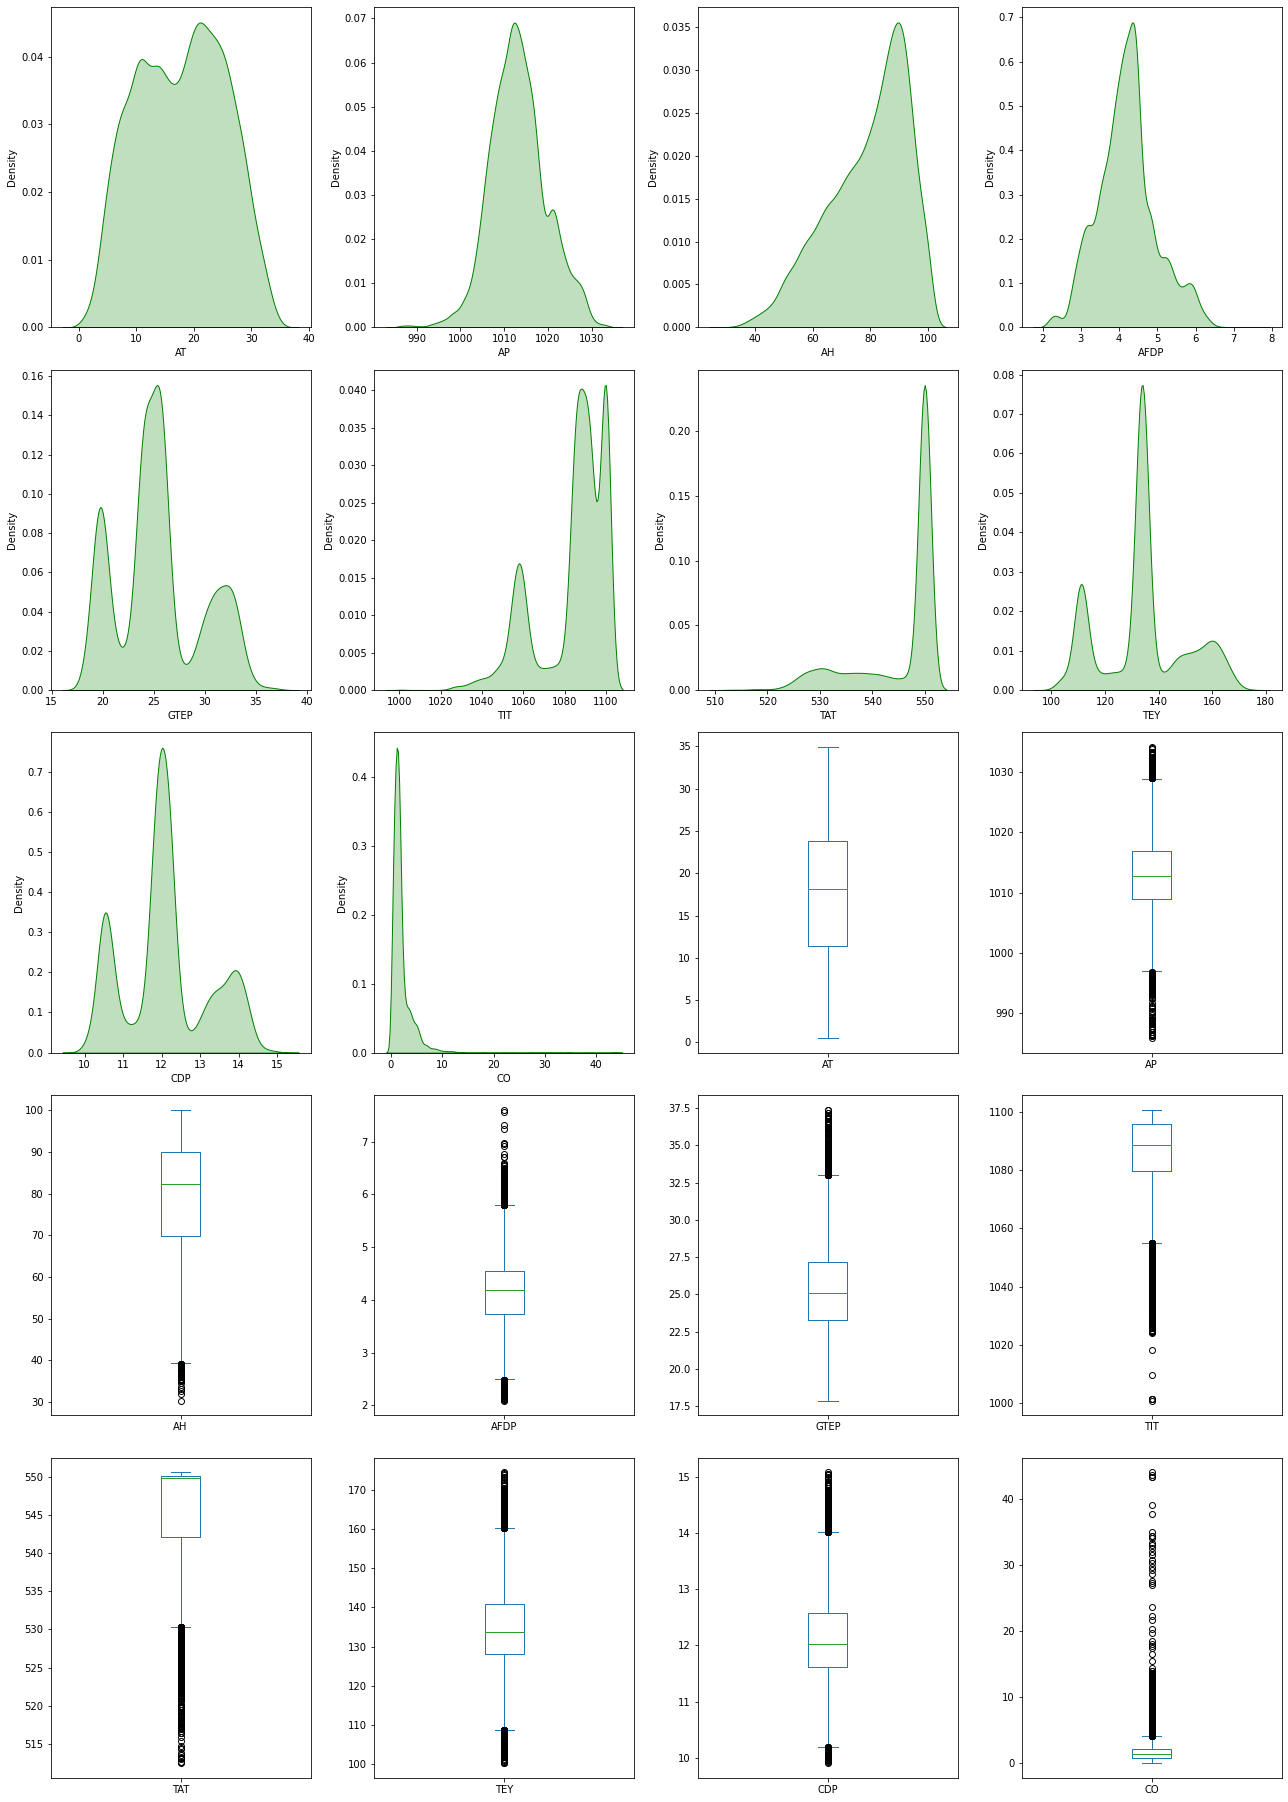

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116


In [32]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

<AxesSubplot:>

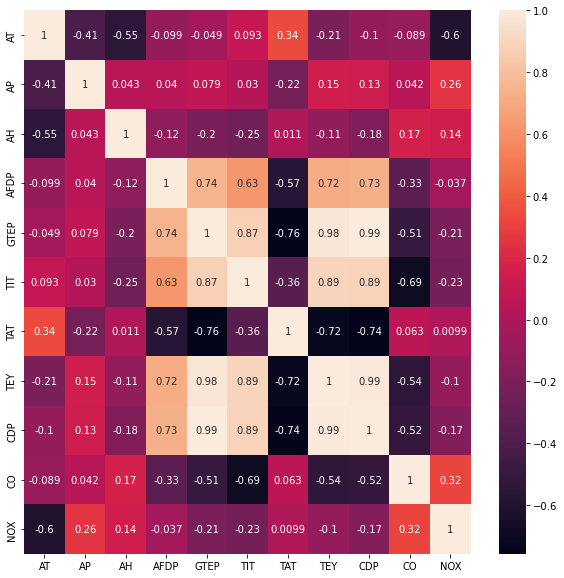

In [33]:
#Finding Correlation
corr = df1[df1.columns[0:11]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Neural Network Model

In [47]:
df1.head(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.0,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.0,114.72,10.598,3.2363,82.776


In [48]:

X = df1.loc[:,['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]
y=df1.loc[:,['TEY']]

In [49]:
# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X)

StandardScaler()

In [50]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [51]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (10527, 10)
Shape of x_test:  (4512, 10)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


In [56]:
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(10, input_dim=10, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Fit the model
model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 1s 2ms/step - loss: 1.0404 - mse: 1.0404
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9938 - mse: 0.9938
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9950 - mse: 0.9950
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9943 - mse: 0.9943
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9941 - mse: 0.9941
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9937 - mse: 0.9937
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9940 - mse: 0.9940
Epoch 8/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9949 - mse: 0.9949
Epoch 9/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9939 - mse: 0.9939
Epoch 10/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9938 - mse: 0.9938
Epoch 11/100
264/264 [=================

264/264 [==============================] - 1s 2ms/step - loss: 0.9936 - mse: 0.9936
Epoch 86/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9933 - mse: 0.9933
Epoch 87/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9934 - mse: 0.9934
Epoch 88/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9932 - mse: 0.9932
Epoch 89/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9937 - mse: 0.9937
Epoch 90/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9935 - mse: 0.9935
Epoch 91/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9933 - mse: 0.9933
Epoch 92/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9935 - mse: 0.9935
Epoch 93/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9935 - mse: 0.9935
Epoch 94/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9934 - mse: 0.9934
Epoch 95/100
264/264 [=====================

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [58]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 0s 2ms/step - loss: 1.0166 - mse: 1.0166
mse


In [59]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

329/329 [==============================] - 1s 3ms/step - loss: 0.9932 - mse: 0.9932
Accuracy: 99.32
